# MONOGRAFÍA : Predicción de resultados en encuentros profesionales de tenis de campo*

## Universidad de Antioquia
## Desarrollado por:

*Nombre Completo:Daniel Vanegas Gómez*

*Cédula:1036399967*

*Correo Institucional:daniel.vanegasg@udea.edu.co*

## 1. Librerias y configuraciones previas


In [132]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================

from scipy.stats import pearsonr
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import math


#Creacion de los modelos
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Creacion de los modelos bayesianos
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

#Creacion de los modelos KNN vs Gaussian
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

# Preprocesado y modelado Maquina de vector de soporte
# ==============================================================================
from scipy.stats import pearsonr
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import math

# Preprocesado y modelado Random Forest
# ==============================================================================

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


#creación de modelos Random Forest
from sklearn.ensemble import RandomForestClassifier


#import statsmodels.api as sm Random Forest
import math
import statsmodels.api as sm


#evaluacion de variables
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


import statsmodels.api as sm
import math

#from sklearn.svm import LinearSVC

from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Permitir ver todas las filas y columnas
pd.set_option("display.max_rows", None, "display.max_columns", None)

## 2. Funciones

In [133]:
## Aqui se insertan las funciones propias
## =============================================================================

# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

## 3. Carga del dataset

### Descripción de la base de datos 🚮

**Nombre:** ATP matches

**Website:** https://www.kaggle.com/datasets/sijovm/atpdata

**Descripción:** 

El dataset contiene el detalle acerca de todos los partidos de la ATP jugados desde 1968. Las estadísticas de los partidos están disponibles desde 1991.

**Créditos** - 
1) http://www.tennisabstract.com/
2) Jeff Sackmann


**Información de atributos**

**Variables de entrada:**

• best_of - El máximo número de sets jugados (3 o 5)

• draw_size - El tamaño del cuadro

• 1stin - Puntos jugados con el primer servicio

• 1stWon - Puntos ganados con el primer servicio

• 2ndWon - Puntos ganados con el segundo servicio

• SvGms - Numero de games jugados al servicio (Así, la máxima diferencia entre wSvGms y lSvGms será de 1)

• ace - Número de Aces en el partido

• bpFaced - Puntos de quiebre enfrentados

• bpSaved - Puntos de quiebre salvados

• df - Dobles faltas

• svpt - Procentaje de servicio

• age - Edad del jugador

• entry - Cómo entró el jugador al torneo?

WC - Wildcard

Q - Qualifier

LL - Lucky loser

PR - Protected ranking

SE - Special Exempt

ALT - Alternate player

• hand - Mano hábil del jugador, right o left

• ht - La altura del jugador

• id - Id del jugador

• IOC - País de origen del jugador

• name - Nombre del jugador

• rank - Ranking del jugador

• seed - La siembra del jugador en el torneo

• match num - Número de partido en un determinado torneo

• minutes - Duración del partido en minutos

• round - Ronda a la que pertenece el partido en el torneo

• score - Resultado final del partido

• surface - Superficie en la cual el partido es jugado

• tourney_date - Fecha de inicio del torneo

• tourneyid - id del torneo

• tourney_level - Nivel del torneo

'G' = Grand Slams

'M' = Masters 1000s

'A' = other tour-level events

'C' = Challengers

'S' = Satellites/ITFs

'F' = Tour finals and other season-ending events

'D' = Davis Cup

• tourneyname - Nombre del torneo




In [134]:
## Cargar datos con colab
## =============================================================================
from google.colab import drive
drive.mount('/content/drive')
tenis=pd.read_csv('/content/drive/My Drive/Estudio/UDEA/Especializacion/Monografia/data/tennis_matches.csv')
#tenis=pd.read_csv('tennis_matches.csv')
tenis.info()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169690 entries, 0 to 169689
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   best_of             169690 non-null  int64  
 1   draw_size           1232 non-null    float64
 2   l_1stIn             83415 non-null   float64
 3   l_1stWon            83415 non-null   float64
 4   l_2ndWon            83415 non-null   float64
 5   l_SvGms             83415 non-null   float64
 6   l_ace               83415 non-null   float64
 7   l_bpFaced           83415 non-null   float64
 8   l_bpSaved           83415 non-null   float64
 9   l_df                83415 non-null   float64
 10  l_svpt              83415 non-null   float64
 11  loser_age           164700 non-null  float64
 12  loser_entry         25339 non-null   object 
 13  loser

Revisando los tipos de datos se evidencia que hay 5 variables de tipo entero, 14 de tipo string y 30 de tipo flotante. Asimismo en todas las variables menos en 13 existen registros faltantes, lo cual se explica en parte debido a que sólo desde el año 1991 se tienen registros de las estadísticas de los partidos. Por lo tanto se decide eliminar todos los registros que estén antes de 1991.

In [135]:
t=tenis[tenis["tourney_date"]>19910101]
t.head(3)

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,loser_age,loser_entry,loser_hand,loser_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_rank_points,loser_seed,match_num,minutes,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
76863,3,NaN,30.0,17.0,7.0,8.0,3.0,6.0,2.0,0.0,46.0,20.64,NaN,R,175.0,101746,ITA,Renzo Furlan,78.0,459.0,NaN,1,63.0,R32,6-4 6-1,Hard,19910107,1991-301,A,Auckland,37.0,30.0,7.0,9.0,1.0,6.0,5.0,0.0,53.0,25.61,NaN,R,180.0,101142,ESP,Emilio Sanchez,9.0,1487.0,1.0
76864,3,NaN,30.0,22.0,6.0,8.0,4.0,11.0,7.0,7.0,56.0,31.82,WC,R,188.0,100587,NZL,Steve Guy,220.0,114.0,NaN,2,72.0,R32,6-3 6-2,Hard,19910107,1991-301,A,Auckland,25.0,17.0,20.0,9.0,5.0,2.0,1.0,1.0,56.0,21.55,Q,R,180.0,101613,USA,Malivai Washington,94.0,371.0,NaN
76865,3,NaN,43.0,24.0,14.0,11.0,1.0,8.0,4.0,3.0,68.0,21.70,WC,R,185.0,101601,NZL,Brett Steven,212.0,116.0,NaN,3,101.0,R32,2-6 6-1 6-2,Hard,19910107,1991-301,A,Auckland,55.0,35.0,16.0,12.0,2.0,4.0,2.0,4.0,80.0,25.32,NaN,R,185.0,101179,FRA,Jean Philippe Fleurian,77.0,468.0,NaN


## 4. Limpieza de datos y preparación

Se eliminarán las variables que se consideran que no son relevantes de cara al modelo, incluyendo tourney_date, como lo son: draw_size, id, ioc, seed, match_num, round, tourney_date, entre otros.

In [136]:
"""list_col=t.columns.values.tolist()
f_list=[]
excluir=["size","tourney",]
for i in list_col:
  if i=="tourney_level":
    f_list.append(i)
  elif "size" in i or "tourney" in i or "points" in i or "entry" in i or "id" in i or "ioc" in i or "age" in i or "seed" in i or "round" in i or "num" in i or "ht" in i or "hand" in i:
    pass
  else:
    f_list.append(i)"""

'list_col=t.columns.values.tolist()\nf_list=[]\nexcluir=["size","tourney",]\nfor i in list_col:\n  if i=="tourney_level":\n    f_list.append(i)\n  elif "size" in i or "tourney" in i or "points" in i or "entry" in i or "id" in i or "ioc" in i or "age" in i or "seed" in i or "round" in i or "num" in i or "ht" in i or "hand" in i:\n    pass\n  else:\n    f_list.append(i)'

In [137]:
"""t=t[f_list] # El dataset contiene únicamente las columnas deseadas
t.head(3)"""

't=t[f_list] # El dataset contiene únicamente las columnas deseadas\nt.head(3)'

Para el presente análisis se tendrán en cuenta únicamente los partidos entre jugadores ubicados entre los 100 primeros del ranking y sólo en torneos de categoria G, M ó A que son las categorías principales de tenis.

In [138]:
t= t[(t["loser_rank"]<=100) & (t["winner_rank"]<=100) & (t["tourney_level"]=="G") | (t["tourney_level"]=="M") | (t["tourney_level"]=="A")] # Sólo se tienen en cuenta partidos entre jugadores ubicados en el top 100 y los torneos G, M y A
t.head(3)

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,loser_age,loser_entry,loser_hand,loser_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_rank_points,loser_seed,match_num,minutes,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
76863,3,NaN,30.0,17.0,7.0,8.0,3.0,6.0,2.0,0.0,46.0,20.64,NaN,R,175.0,101746,ITA,Renzo Furlan,78.0,459.0,NaN,1,63.0,R32,6-4 6-1,Hard,19910107,1991-301,A,Auckland,37.0,30.0,7.0,9.0,1.0,6.0,5.0,0.0,53.0,25.61,NaN,R,180.0,101142,ESP,Emilio Sanchez,9.0,1487.0,1.0
76864,3,NaN,30.0,22.0,6.0,8.0,4.0,11.0,7.0,7.0,56.0,31.82,WC,R,188.0,100587,NZL,Steve Guy,220.0,114.0,NaN,2,72.0,R32,6-3 6-2,Hard,19910107,1991-301,A,Auckland,25.0,17.0,20.0,9.0,5.0,2.0,1.0,1.0,56.0,21.55,Q,R,180.0,101613,USA,Malivai Washington,94.0,371.0,NaN
76865,3,NaN,43.0,24.0,14.0,11.0,1.0,8.0,4.0,3.0,68.0,21.70,WC,R,185.0,101601,NZL,Brett Steven,212.0,116.0,NaN,3,101.0,R32,2-6 6-1 6-2,Hard,19910107,1991-301,A,Auckland,55.0,35.0,16.0,12.0,2.0,4.0,2.0,4.0,80.0,25.32,NaN,R,185.0,101179,FRA,Jean Philippe Fleurian,77.0,468.0,NaN


In [139]:
t.shape #  Nuevo tamaño del dataset

(78050, 49)

In [140]:
# Revisión de duplicados
t.loc[t.duplicated()]

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,loser_age,loser_entry,loser_hand,loser_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_rank_points,loser_seed,match_num,minutes,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed


In [141]:
t = t.drop_duplicates()

In [142]:
t.replace('?',np.nan, inplace=True)

In [143]:
for col in t.columns:
    print (col, np.sum(pd.isnull(t[col]))) # Se cuentan la cantidad de valores nulos eb cada una de las variables

best_of 0
draw_size 78050
l_1stIn 1290
l_1stWon 1290
l_2ndWon 1290
l_SvGms 1290
l_ace 1290
l_bpFaced 1290
l_bpSaved 1290
l_df 1290
l_svpt 1290
loser_age 37
loser_entry 62416
loser_hand 0
loser_ht 3693
loser_id 0
loser_ioc 0
loser_name 0
loser_rank 246
loser_rank_points 1164
loser_seed 58095
match_num 0
minutes 2494
round 0
score 2
surface 0
tourney_date 0
tourney_id 0
tourney_level 0
tourney_name 0
w_1stIn 1290
w_1stWon 1290
w_2ndWon 1290
w_SvGms 1290
w_ace 1290
w_bpFaced 1290
w_bpSaved 1290
w_df 1290
w_svpt 1290
winner_age 2
winner_entry 68422
winner_hand 0
winner_ht 2105
winner_id 0
winner_ioc 0
winner_name 0
winner_rank 65
winner_rank_points 993
winner_seed 42540


Se evidencia que existen variables con registros nulos o vacíos en muchos registros como lo son seed, entry y draw_size. Asumiendo que el tamaño del cuadro del torneo y la siembra no afectan el desempeño de los jugadores en los partidos, se decide eliminar aquellas variables en las cuales los registros nulos son mayores al 5% del total de registros.

In [144]:
for col in t.columns:
    if np.sum(pd.isnull(t[col]))>4000:
      t.drop(col, axis=1, inplace=True)
    else:
      pass # Se cuentan la cantidad de valores nulos eb cada una de las variables

In [145]:
for col in t.columns:
    print (col, np.sum(pd.isnull(t[col]))) # Se cuentan la cantidad de valores nulos en cada una de las variables

best_of 0
l_1stIn 1290
l_1stWon 1290
l_2ndWon 1290
l_SvGms 1290
l_ace 1290
l_bpFaced 1290
l_bpSaved 1290
l_df 1290
l_svpt 1290
loser_age 37
loser_hand 0
loser_ht 3693
loser_id 0
loser_ioc 0
loser_name 0
loser_rank 246
loser_rank_points 1164
match_num 0
minutes 2494
round 0
score 2
surface 0
tourney_date 0
tourney_id 0
tourney_level 0
tourney_name 0
w_1stIn 1290
w_1stWon 1290
w_2ndWon 1290
w_SvGms 1290
w_ace 1290
w_bpFaced 1290
w_bpSaved 1290
w_df 1290
w_svpt 1290
winner_age 2
winner_hand 0
winner_ht 2105
winner_id 0
winner_ioc 0
winner_name 0
winner_rank 65
winner_rank_points 993


In [146]:
t[t.l_1stIn .isnull()].head(5) # Se revisan 5 registros que son nulos para revisar la composición de los datos.

,best_of,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,loser_age,loser_hand,loser_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_rank_points,match_num,minutes,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt,winner_age,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points
76888,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.47,R,180.0,101377,SWE,Christian Bergstrom,69.0,491.0,26,NaN,QF,W/O,Hard,19910107,1991-301,A,Auckland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.39,R,183.0,100954,BRA,Luiz Mattar,45.0,645.0
76889,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.53,R,188.0,101767,SWE,Lars Jonsson,84.0,432.0,27,NaN,QF,W/O,Hard,19910107,1991-301,A,Auckland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.77,R,190.0,101120,CZE,Karel Novacek,35.0,759.0
77408,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.89,R,188.0,101123,GER,Alexander Mronz,86.0,420.0,25,NaN,QF,W/O,Carpet,19910225,1991-411,A,Chicago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.02,L,180.0,100581,USA,John Mcenroe,19.0,1072.0
77507,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.04,L,180.0,100581,USA,John Mcenroe,16.0,1192.0,31,NaN,R32,7-6(7) 7-5,Hard,19910304,1991-404,M,Indian Wells Masters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.89,R,193.0,101026,USA,Jim Grabb,73.0,468.0
77816,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.38,R,190.0,101414,GER,Boris Becker,2.0,3440.0,41,NaN,R16,6-2 6-4,Clay,19910408,1991-425,A,Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.22,R,188.0,101843,ESP,Sergi Bruguera,21.0,1072.0


Teniendo en cuenta que el dataset tiene 78.050 registros y los que son nulos representan el 1,5% de los datos, se toma la decisión de eliminarlos.

In [147]:
t=t.dropna() # Se eliminan los datos nulos
t.shape

(69546, 44)

In [148]:
corr = t.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,best_of,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,loser_age,loser_ht,loser_id,loser_rank,loser_rank_points,match_num,minutes,tourney_date,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt,winner_age,winner_ht,winner_id,winner_rank,winner_rank_points
best_of,1.000000,0.490635,0.455263,0.345919,0.539454,0.202092,0.350262,0.256979,0.197755,0.525741,0.026683,0.020402,0.051778,-0.132889,0.113861,0.198979,0.343741,0.063909,0.483688,0.525808,0.378981,0.547502,0.247215,0.202519,0.176715,0.177137,0.496117,0.017742,0.032269,0.057716,-0.145722,0.170987
l_1stIn,0.490635,1.000000,0.948611,0.555706,0.873621,0.391198,0.458803,0.488825,0.210111,0.924840,0.022006,0.046346,0.039943,-0.100095,0.108540,0.126273,0.745127,0.048457,0.794728,0.796080,0.600251,0.860098,0.335558,0.473307,0.368697,0.339369,0.824136,0.028788,0.048600,0.037868,-0.045285,0.043906
l_1stWon,0.455263,0.948611,1.000000,0.603643,0.897013,0.543392,0.309128,0.399180,0.266443,0.914162,0.034052,0.125403,0.049292,-0.112924,0.129968,0.130966,0.740935,0.063188,0.813131,0.846740,0.651686,0.887879,0.412757,0.417903,0.344268,0.352051,0.845415,0.040180,0.087663,0.047551,-0.041627,0.037920
l_2ndWon,0.345919,0.555706,0.603643,1.000000,0.766257,0.422363,0.279722,0.356286,0.330027,0.782064,-0.000827,0.043844,-0.007819,-0.088458,0.083314,0.071526,0.665424,-0.007284,0.654568,0.677596,0.620011,0.756630,0.334073,0.385989,0.314587,0.350950,0.724665,0.021189,0.055539,-0.018776,-0.021546,-0.003822
l_SvGms,0.539454,0.873621,0.897013,0.766257,1.000000,0.490474,0.362882,0.352677,0.317086,0.934754,0.019063,0.072597,0.028441,-0.117874,0.123933,0.128082,0.810178,0.037104,0.869936,0.871376,0.710898,0.982422,0.380597,0.544376,0.425100,0.411694,0.925809,0.026340,0.048911,0.025814,-0.042645,0.030847
l_ace,0.202092,0.391198,0.543392,0.422363,0.490474,1.000000,-0.017562,0.096848,0.251433,0.455884,0.041157,0.359488,0.077312,-0.090916,0.123371,0.099254,0.365083,0.095889,0.424469,0.485939,0.391622,0.487257,0.311914,0.111417,0.114371,0.187673,0.440300,0.075581,0.038849,0.065208,-0.029446,0.042744
l_bpFaced,0.350262,0.458803,0.309128,0.279722,0.362882,-0.017562,1.000000,0.921543,0.246224,0.518342,-0.025872,-0.097723,-0.041489,-0.019124,-0.003894,0.039127,0.361526,-0.050040,0.298831,0.224478,0.191448,0.342057,-0.054119,0.370270,0.242072,0.165358,0.327453,-0.028166,-0.121277,-0.039904,-0.043049,0.036731
l_bpSaved,0.256979,0.488825,0.399180,0.356286,0.352677,0.096848,0.921543,1.000000,0.225985,0.540427,-0.008790,-0.036578,-0.017178,-0.024730,0.012509,0.040247,0.372385,-0.019810,0.299637,0.268346,0.224857,0.340999,0.042037,0.266095,0.190315,0.152351,0.322914,-0.006349,-0.056140,-0.017895,-0.034947,0.029460
l_df,0.197755,0.210111,0.266443,0.330027,0.317086,0.251433,0.246224,0.225985,1.000000,0.366512,-0.031510,0.100673,-0.068185,-0.005177,-0.017129,0.006033,0.228972,-0.074216,0.249367,0.249814,0.256064,0.305915,0.113132,0.194495,0.145579,0.238199,0.296680,-0.007102,-0.016697,-0.076795,0.035880,-0.053711
l_svpt,0.525741,0.924840,0.914162,0.782064,0.934754,0.455884,0.518342,0.540427,0.366512,1.000000,0.008512,0.054139,0.008399,-0.105220,0.104741,0.117501,0.797498,0.012850,0.829498,0.827873,0.671966,0.918166,0.341020,0.519630,0.402362,0.393153,0.883254,0.020371,0.026467,0.003358,-0.046362,0.033868


In [149]:
df_full=t.copy() #Se hace una copia de df para hacer pruebas con todas las variables en modelos más adelante

Se procede a eliminar las variables que presentan una correlación alta ya que una sóla puede explicar en gran medida a la otra.

In [150]:
t= t.drop(["l_SvGms","w_SvGms","w_1stWon","l_1stWon","minutes","l_svpt","w_svpt","l_bpSaved","w_bpSaved","l_1stIn","w_1stIn","loser_ioc","tourney_date","loser_id","winner_id","match_num","winner_rank_points","loser_rank_points","best_of","tourney_id","tourney_name","winner_ioc","round"], axis=1) # Se eliminan las variables que presentan una alta correlacion así como las variables que no aportan información relevante de cara a lo que se quiere predecir como el id del jugador, rank_points_match_num, best_of, 

In [151]:
corr = t.corr ()
corr.style.background_gradient (cmap = 'coolwarm') # Se grafica nuevamente y se analizan de nuevo las correlaciones

,l_2ndWon,l_ace,l_bpFaced,l_df,loser_age,loser_ht,loser_rank,w_2ndWon,w_ace,w_bpFaced,w_df,winner_age,winner_ht,winner_rank
l_2ndWon,1.000000,0.422363,0.279722,0.330027,-0.000827,0.043844,-0.088458,0.620011,0.334073,0.385989,0.350950,0.021189,0.055539,-0.021546
l_ace,0.422363,1.000000,-0.017562,0.251433,0.041157,0.359488,-0.090916,0.391622,0.311914,0.111417,0.187673,0.075581,0.038849,-0.029446
l_bpFaced,0.279722,-0.017562,1.000000,0.246224,-0.025872,-0.097723,-0.019124,0.191448,-0.054119,0.370270,0.165358,-0.028166,-0.121277,-0.043049
l_df,0.330027,0.251433,0.246224,1.000000,-0.031510,0.100673,-0.005177,0.256064,0.113132,0.194495,0.238199,-0.007102,-0.016697,0.035880
loser_age,-0.000827,0.041157,-0.025872,-0.031510,1.000000,-0.007935,-0.066264,-0.002940,0.084939,-0.029361,-0.010060,0.137933,0.054317,-0.025158
loser_ht,0.043844,0.359488,-0.097723,0.100673,-0.007935,1.000000,-0.049627,0.055051,0.025079,-0.061624,-0.001020,0.048127,0.031459,-0.033298
loser_rank,-0.088458,-0.090916,-0.019124,-0.005177,-0.066264,-0.049627,1.000000,-0.084118,-0.067955,-0.059114,-0.010175,-0.019802,-0.041014,0.136184
w_2ndWon,0.620011,0.391622,0.191448,0.256064,-0.002940,0.055051,-0.084118,1.000000,0.309291,0.428302,0.396942,0.002408,0.023508,-0.029478
w_ace,0.334073,0.311914,-0.054119,0.113132,0.084939,0.025079,-0.067955,0.309291,1.000000,0.010791,0.247388,0.047075,0.403243,-0.079525
w_bpFaced,0.385989,0.111417,0.370270,0.194495,-0.029361,-0.061624,-0.059114,0.428302,0.010791,1.000000,0.371680,-0.019123,-0.102508,0.042460


El dataset final contiene 7 variables numéricas que se convierten en 14 teniendo en cuenta que una es para el ganador y una para el perdedor

Se crea una variable llamada "Resultado" que podrá tomar dos valores: P: Perdedor, G:Ganador. Teniendo en cuenta que inicialmente el jugador de referencia será "loser_name", la variable nueva tendrá el valor "P"


In [152]:
t["Resultado"]="P"
t.head()

,l_2ndWon,l_ace,l_bpFaced,l_df,loser_age,loser_hand,loser_ht,loser_name,loser_rank,score,surface,tourney_level,w_2ndWon,w_ace,w_bpFaced,w_df,winner_age,winner_hand,winner_ht,winner_name,winner_rank,Resultado
76863,7.0,3.0,6.0,0.0,20.64,R,175.0,Renzo Furlan,78.0,6-4 6-1,Hard,A,7.0,1.0,6.0,0.0,25.61,R,180.0,Emilio Sanchez,9.0,P
76864,6.0,4.0,11.0,7.0,31.82,R,188.0,Steve Guy,220.0,6-3 6-2,Hard,A,20.0,5.0,2.0,1.0,21.55,R,180.0,Malivai Washington,94.0,P
76865,14.0,1.0,8.0,3.0,21.70,R,185.0,Brett Steven,212.0,2-6 6-1 6-2,Hard,A,16.0,2.0,4.0,4.0,25.32,R,185.0,Jean Philippe Fleurian,77.0,P
76866,15.0,3.0,12.0,2.0,23.85,L,173.0,Gilad Bloom,72.0,6-3 1-6 6-4,Hard,A,14.0,0.0,10.0,1.0,25.83,R,180.0,Eric Jelen,65.0,P
76867,12.0,1.0,6.0,3.0,20.70,R,196.0,Richard Fromberg,28.0,6-3 6-4,Hard,A,12.0,4.0,2.0,4.0,19.71,R,185.0,Chuck Adams,190.0,P


In [153]:
# Se realiza una copia del dataset
t_new= t.copy()

In [154]:
# Se crean dos nuevos datasets, uno que contenga la información del jugador perdedor y otra con el ganador, compartiendo en ambos datasets las variables comunes a ambos en los partidos y que no dependen del desempeño del jugador en el encuentro como lo son: surface, tourney_level, y el nombre del oponente. Para esta fase se decide no tener en cuenta la variable score.

loser=t_new.rename(columns={"l_2ndWon":"J1_2ndWon","l_ace":"J1_ace","l_bpFaced":"J1_bpFaced","l_df":"J1_df","loser_age":"J1_age","loser_hand":"J1_hand","loser_ht":"J1_ht","loser_name":"J1_name","loser_rank":"J1_rank","w_2ndWon":"J2_2ndWon","w_ace":"J2_ace","w_bpFaced":"J2_bpFaced","w_df":"J2_df","winner_age":"J2_age","winner_hand":"J2_hand","winner_ht":"J2_ht","winner_name":"J2_name","winner_rank":"J2_rank"}).drop("score", axis=1) #Se cambian los nombres de las columnas y el jugador 1 siempre es el perdedor
winner=t_new.rename(columns={"l_2ndWon":"J2_2ndWon","l_ace":"J2_ace","l_bpFaced":"J2_bpFaced","l_df":"J2_df","loser_age":"J2_age","loser_hand":"J2_hand","loser_ht":"J2_ht","loser_name":"J2_name","loser_rank":"J2_rank","w_2ndWon":"J1_2ndWon","w_ace":"J1_ace","w_bpFaced":"J1_bpFaced","w_df":"J1_df","winner_age":"J1_age","winner_hand":"J1_hand","winner_ht":"J1_ht","winner_name":"J1_name","winner_rank":"J1_rank"}).drop("score", axis=1) #Se cambian los nombres de las columnas y a las columnas del winner se le asigna el nombre "J1" para concatener el dataframe con el de loser
winner["Resultado"]="G"  #Se asigna el valor de "G" a resultado ya que se invirtió el orden de los jugadores

In [155]:
df= pd.concat([loser, winner]).reset_index().drop("index", axis=1) # Se concatenan los datasets y ya se tiene una variable objetivo "Resultado" que será la que se querrá predecir con el modelo
df.shape

(139092, 21)

In [156]:
# Se convierten todas las columnas flotantes en enteras
df[['J1_2ndWon', 'J1_ace', 'J1_bpFaced', 'J1_df', 'J1_age', 'J1_ht', 'J2_2ndWon', 'J2_ace', 'J2_bpFaced', 'J2_df', 'J2_age', 'J2_ht',"J1_rank","J2_rank"]]=df[['J1_2ndWon', 'J1_ace', 'J1_bpFaced', 'J1_df', 'J1_age', 'J1_ht', 'J2_2ndWon', 'J2_ace', 'J2_bpFaced', 'J2_df', 'J2_age', 'J2_ht',"J1_rank","J2_rank"]].astype("int")

## 5. Visualización de datos

In [157]:
df.groupby('Resultado').Resultado.count().sort_values(ascending=False)

Resultado
G    69546
P    69546
Name: Resultado, dtype: int64

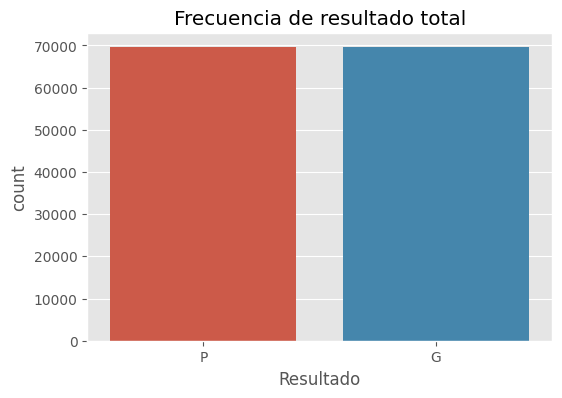

In [158]:
plt.figure(figsize=(6,4))  

plt.title('Frecuencia de resultado total')
sns.countplot(x=df['Resultado'])

plt.show()

Se evidencia que existe un 50-50 entre victorias y derrotas en el dataset que se explica por la duplicación de los datos, aún así este comportamiento no es igual entre los diferentes jugadores.

In [159]:
df.head()

,J1_2ndWon,J1_ace,J1_bpFaced,J1_df,J1_age,J1_hand,J1_ht,J1_name,J1_rank,surface,tourney_level,J2_2ndWon,J2_ace,J2_bpFaced,J2_df,J2_age,J2_hand,J2_ht,J2_name,J2_rank,Resultado
0,7,3,6,0,20,R,175,Renzo Furlan,78,Hard,A,7,1,6,0,25,R,180,Emilio Sanchez,9,P
1,6,4,11,7,31,R,188,Steve Guy,220,Hard,A,20,5,2,1,21,R,180,Malivai Washington,94,P
2,14,1,8,3,21,R,185,Brett Steven,212,Hard,A,16,2,4,4,25,R,185,Jean Philippe Fleurian,77,P
3,15,3,12,2,23,L,173,Gilad Bloom,72,Hard,A,14,0,10,1,25,R,180,Eric Jelen,65,P
4,12,1,6,3,20,R,196,Richard Fromberg,28,Hard,A,12,4,2,4,19,R,185,Chuck Adams,190,P


In [160]:
federer= df.copy()
federer.head()

,J1_2ndWon,J1_ace,J1_bpFaced,J1_df,J1_age,J1_hand,J1_ht,J1_name,J1_rank,surface,tourney_level,J2_2ndWon,J2_ace,J2_bpFaced,J2_df,J2_age,J2_hand,J2_ht,J2_name,J2_rank,Resultado
0,7,3,6,0,20,R,175,Renzo Furlan,78,Hard,A,7,1,6,0,25,R,180,Emilio Sanchez,9,P
1,6,4,11,7,31,R,188,Steve Guy,220,Hard,A,20,5,2,1,21,R,180,Malivai Washington,94,P
2,14,1,8,3,21,R,185,Brett Steven,212,Hard,A,16,2,4,4,25,R,185,Jean Philippe Fleurian,77,P
3,15,3,12,2,23,L,173,Gilad Bloom,72,Hard,A,14,0,10,1,25,R,180,Eric Jelen,65,P
4,12,1,6,3,20,R,196,Richard Fromberg,28,Hard,A,12,4,2,4,19,R,185,Chuck Adams,190,P


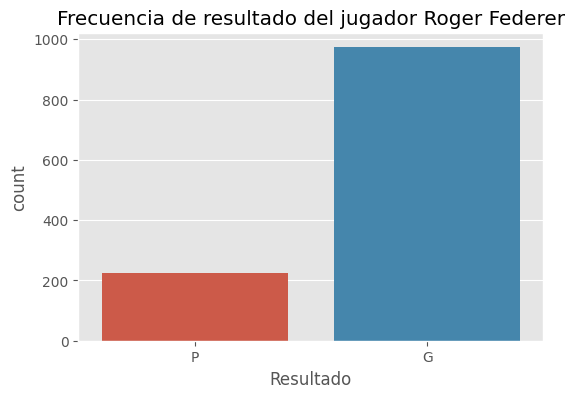

In [161]:
federer= df.copy()
federer=federer[federer["J1_name"]=="Roger Federer"]

plt.figure(figsize=(6,4))  

plt.title('Frecuencia de resultado del jugador Roger Federer')
sns.countplot(x=federer['Resultado'])

plt.show()

In [162]:
federer.Resultado.value_counts()

G    973
P    224
Name: Resultado, dtype: int64

#### Datos Categóricos

In [163]:
catCols=df.select_dtypes(include = ["object"]).columns.tolist()
df[catCols].head()

,J1_hand,J1_name,surface,tourney_level,J2_hand,J2_name,Resultado
0,R,Renzo Furlan,Hard,A,R,Emilio Sanchez,P
1,R,Steve Guy,Hard,A,R,Malivai Washington,P
2,R,Brett Steven,Hard,A,R,Jean Philippe Fleurian,P
3,L,Gilad Bloom,Hard,A,R,Eric Jelen,P
4,R,Richard Fromberg,Hard,A,R,Chuck Adams,P


In [164]:
catCols.remove('Resultado')
print(catCols)

['J1_hand', 'J1_name', 'surface', 'tourney_level', 'J2_hand', 'J2_name']


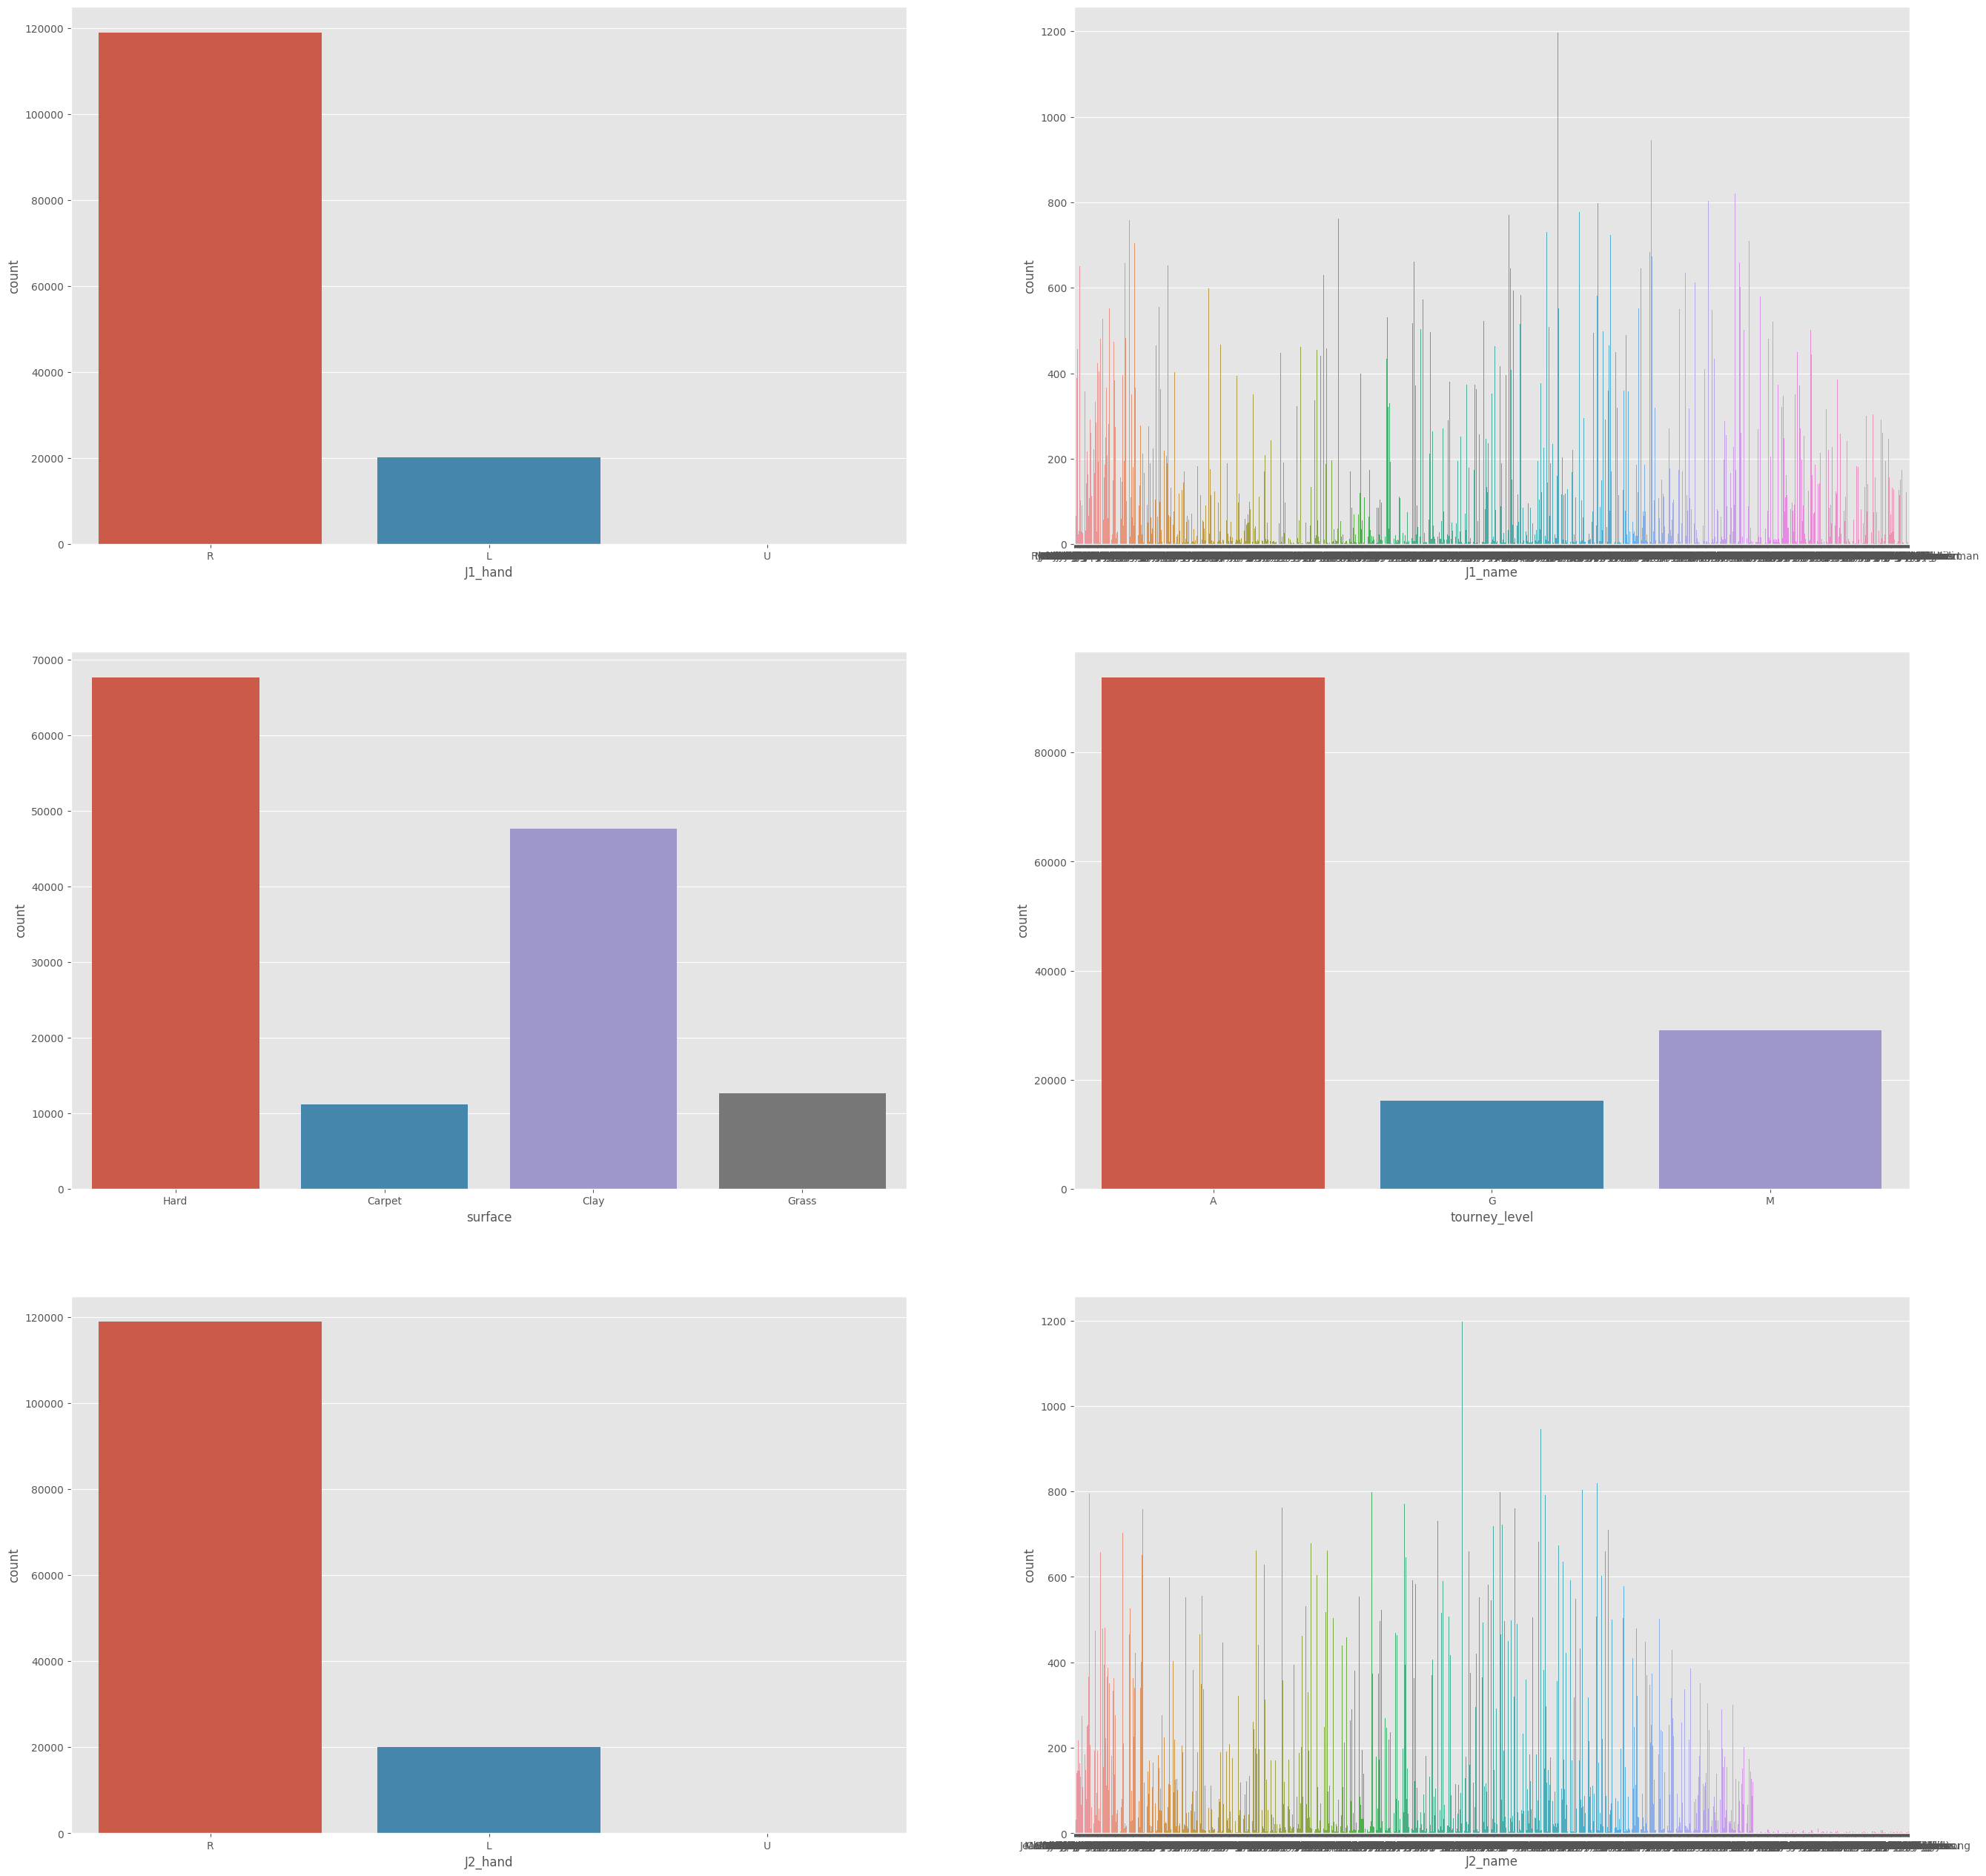

In [165]:
plot_multiples_graficas(df,catCols, 2, 3, 'c', None, (32,32))

Se evidencia que en las variables J1_hand y J2_hand existen 3 posibles categorías: R (Right), L (Left) y U (Unknown). Como para los fines que se desea entrenar el modelo se debe saber si los jugadores son derechos o zurdos, se eliminarán los registros que tengan "U". Asimismo, se identifica que los nombres de los jugadores son muchos lo que, en caso de codificarlos con  one hot encoder generaría una cantidad muy grande de variables lo cual haría muy complicado la creación del modelo.

In [166]:
print(df[df["J1_hand"]=="U"].shape)  
print(df[df["J2_hand"]=="U"].shape)

(29, 21)
(29, 21)


In [167]:
unknown=df.copy()
a=unknown["J1_name"].unique()

len(a)

1222

Se evidencia que sólo existen 29 registros con la clasificación de "U" por lo que se procede a eliminar dichos registros.

In [168]:
df=df[(df["J1_hand"]!="U") & (df["J2_hand"]!="U")]

In [169]:
numCols=df.select_dtypes(include = ["int"]).columns.tolist()
df[numCols].head()

,J1_2ndWon,J1_ace,J1_bpFaced,J1_df,J1_age,J1_ht,J1_rank,J2_2ndWon,J2_ace,J2_bpFaced,J2_df,J2_age,J2_ht,J2_rank
0,7,3,6,0,20,175,78,7,1,6,0,25,180,9
1,6,4,11,7,31,188,220,20,5,2,1,21,180,94
2,14,1,8,3,21,185,212,16,2,4,4,25,185,77
3,15,3,12,2,23,173,72,14,0,10,1,25,180,65
4,12,1,6,3,20,196,28,12,4,2,4,19,185,190


In [170]:
# Se hace una copia del dataset para hacer pruebas más adelante
df_complete=df.copy()

## 6. Creación de Variables Dummies

In [171]:
# Aplicación de la función de usuario Dummies: one-hot encoding

d =pd.get_dummies(df, drop_first=1)

In [172]:
d.shape

(139034, 2460)

Se evidencia que el dejar los nombres de los jugadores en el dataset hace que al crear las variables dummies el dataset se vuelva muy grande (2466 registros) por lo que se decide excluir los nombres de los jugadores del dataset.

In [173]:
df=df.drop(["J1_name","J2_name"], axis=1)
df.head(2)

,J1_2ndWon,J1_ace,J1_bpFaced,J1_df,J1_age,J1_hand,J1_ht,J1_rank,surface,tourney_level,J2_2ndWon,J2_ace,J2_bpFaced,J2_df,J2_age,J2_hand,J2_ht,J2_rank,Resultado
0,7,3,6,0,20,R,175,78,Hard,A,7,1,6,0,25,R,180,9,P
1,6,4,11,7,31,R,188,220,Hard,A,20,5,2,1,21,R,180,94,P


In [174]:
# Aplicación de la función de usuario Dummies: one-hot encoding

d =pd.get_dummies(df, drop_first=1)
d.shape

(139034, 22)

In [175]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139034 entries, 0 to 139091
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   J1_2ndWon        139034 non-null  int64
 1   J1_ace           139034 non-null  int64
 2   J1_bpFaced       139034 non-null  int64
 3   J1_df            139034 non-null  int64
 4   J1_age           139034 non-null  int64
 5   J1_ht            139034 non-null  int64
 6   J1_rank          139034 non-null  int64
 7   J2_2ndWon        139034 non-null  int64
 8   J2_ace           139034 non-null  int64
 9   J2_bpFaced       139034 non-null  int64
 10  J2_df            139034 non-null  int64
 11  J2_age           139034 non-null  int64
 12  J2_ht            139034 non-null  int64
 13  J2_rank          139034 non-null  int64
 14  J1_hand_R        139034 non-null  uint8
 15  surface_Clay     139034 non-null  uint8
 16  surface_Grass    139034 non-null  uint8
 17  surface_Hard     139034 non-n

In [176]:
d.rename(columns={"Resultado_P":"Resultado"}, inplace=True)
d["Resultado"].replace(1,"P", inplace=True)  #Se reemplaza el valor de Uno por P (Perdedor)
d["Resultado"].replace(0,"G", inplace=True)  #Se reemplaza el valor de Cero por G(Ganador)
d.Resultado.unique()

array(['P', 'G'], dtype=object)

## 7. Dividir el conjunto de datos

En este caso, el 80% de los datos se utilizarán para entrenar el modelo. 

In [207]:
# División de los datos en train y test
# ==============================================================================
vTenis = list(d.columns)
vTenis.remove('Resultado')

X = d[vTenis]
y = d['Resultado']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )



In [179]:
#scaler = MinMaxScaler()
#num_vars = numCols
#X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
#X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

#X_train[num_vars].head()

## 8. Creación del modelo

In [209]:
#Creación del modelo 
modelLR = LogisticRegression()

#Entrenamiento del modelo con 80% de training
modelLR.fit(X_train, y_train)


LogisticRegression()

## 9. Evaluación del modelo

#### 9.1 Evaluar algunas instancias (o ejemplos)

In [181]:
x_i = X_test.sample(n=10)

In [182]:
x_i

,J1_2ndWon,J1_ace,J1_bpFaced,J1_df,J1_age,J1_ht,J1_rank,J2_2ndWon,J2_ace,J2_bpFaced,J2_df,J2_age,J2_ht,J2_rank,J1_hand_R,surface_Clay,surface_Grass,surface_Hard,tourney_level_G,tourney_level_M,J2_hand_R
134841,15,4,3,1,28,188,83,20,5,4,2,25,178,141,1,1,0,0,0,0,1
48035,16,5,3,4,31,190,154,19,5,7,0,20,190,82,1,0,0,1,0,1,1
124615,12,14,0,1,20,196,94,15,1,3,5,27,180,37,1,0,0,1,0,0,1
132673,19,10,3,3,23,188,13,19,11,5,2,27,188,64,1,0,1,0,1,0,1
10529,16,6,6,0,23,188,48,18,1,11,3,20,180,315,1,0,0,1,0,1,1
30044,19,4,2,0,24,183,78,13,5,5,2,25,190,62,1,1,0,0,0,0,1
66404,19,7,2,5,28,183,17,27,12,2,2,25,188,49,1,0,0,1,0,0,1
24425,11,3,6,1,29,175,24,10,3,4,0,25,183,119,1,0,0,1,0,0,1
56709,14,6,4,1,30,185,50,14,10,0,2,26,206,28,0,0,0,1,0,0,1
130154,8,4,2,0,31,185,3,3,2,8,0,31,188,293,1,1,0,0,0,1,1


In [183]:
modelLR.predict(x_i)

array(['P', 'G', 'G', 'G', 'G', 'G', 'P', 'P', 'P', 'G'], dtype=object)

#### Exactitud (*accuracy*)

In [184]:
y_LR = modelLR.predict(X_test)
print("modelLR:",metrics.accuracy_score(y_test, y_LR))

modelLR: 0.8362642500089905


## 10. Eligiendo y evaluando el modelo

### 10.1. Accuracy

In [185]:
#Creación del modelo 

modelLRovrLinea       = LogisticRegression(multi_class = "ovr", solver='liblinear',  random_state=0) #smaller dataset
modelLRovrlbfgs       = LogisticRegression(multi_class = "ovr", solver='lbfgs',  random_state=0) 
modelLRMullbfgs       = LogisticRegression(multi_class = "multinomial", solver='lbfgs',  random_state=0)
modelLRMullNew       = LogisticRegression(multi_class = "multinomial", solver='newton-cg',  random_state=0)
modelLRMullSag       = LogisticRegression(multi_class = "multinomial", solver='sag',  random_state=0)
modelLRMullSaga       = LogisticRegression(multi_class = "ovr", solver='saga',  random_state=0)

#Entrenamiento del modelo con 80% de training

modelLRovrLinea.fit(X_train, y_train)
modelLRovrlbfgs.fit(X_train, y_train)
modelLRMullbfgs.fit(X_train, y_train)
modelLRMullNew.fit(X_train, y_train)
modelLRMullSag.fit(X_train, y_train)
modelLRMullSaga.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='saga')

In [186]:
y_predovrLinea = modelLRovrLinea.predict(X_test)
y_predovrlbfgs = modelLRovrlbfgs.predict(X_test)
y_predMullbfgs = modelLRMullbfgs.predict(X_test)
y_predMullNew = modelLRMullNew.predict(X_test)
y_predMullSag = modelLRMullSag.predict(X_test)
y_predMullNSaga = modelLRMullSaga.predict(X_test)

In [187]:
print("===========Accuracy Logistic Regression ================")
print("ovr - Linear       :",metrics.accuracy_score(y_test, y_predovrLinea))
print("ovr - lbfgs        :",metrics.accuracy_score(y_test, y_predovrlbfgs))
print("multinomial - lbfgs:",metrics.accuracy_score(y_test, y_predMullbfgs))
print("multinomial - Newton:",metrics.accuracy_score(y_test, y_predMullNew))
print("multinomial - Sag:",metrics.accuracy_score(y_test, y_predMullNew))
print("multinomial - Saga:",metrics.accuracy_score(y_test, y_predMullNew))


===========Accuracy Logistic Regression ================
ovr - Linear       : 0.8365519473513864
ovr - lbfgs        : 0.8362642500089905
multinomial - lbfgs: 0.8363361743445895
multinomial - Newton: 0.8366238716869853
multinomial - Sag: 0.8366238716869853
multinomial - Saga: 0.8366238716869853


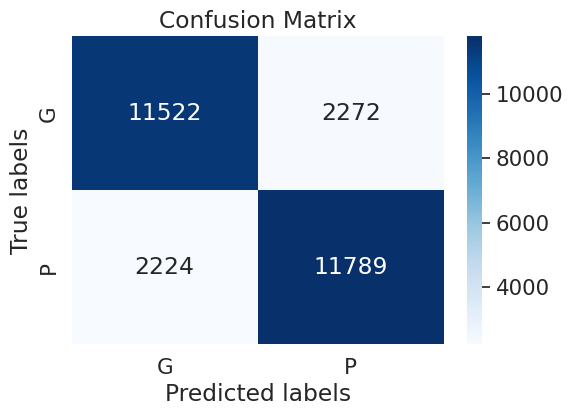

              precision    recall  f1-score   support

           G       0.84      0.84      0.84     13794
           P       0.84      0.84      0.84     14013

    accuracy                           0.84     27807
   macro avg       0.84      0.84      0.84     27807
weighted avg       0.84      0.84      0.84     27807



In [210]:
# Hacer predicciones en el conjunto de prueba
y_pred = modelLR.predict(X_test)

# Definir etiquetas para la matriz de confusión
labels = np.unique(y_test)

# Calcular la matriz de confusión con etiquetas definidas
conf_mat = confusion_matrix(y_test, y_pred, labels=labels)

# Graficar la matriz de confusión con etiquetas definidas
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', ax=ax,
            xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred, target_names=labels))

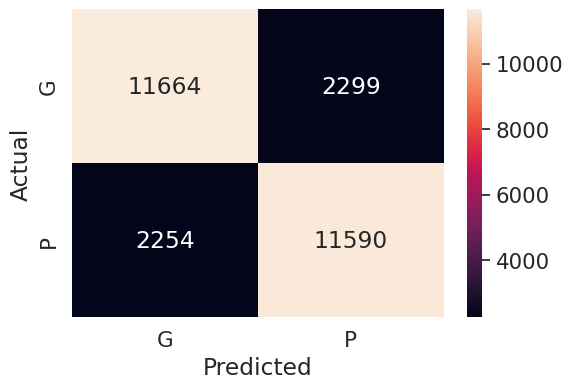

              precision    recall  f1-score   support

           G       0.84      0.84      0.84     13963
           P       0.83      0.84      0.84     13844

    accuracy                           0.84     27807
   macro avg       0.84      0.84      0.84     27807
weighted avg       0.84      0.84      0.84     27807



In [197]:
#Matriz de confusión

conf_mat = confusion_matrix(y_test, y_LR)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=d['Resultado'].sort_values().unique()
            , yticklabels=d['Resultado'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, y_LR, target_names=d['Resultado'].sort_values().unique()))

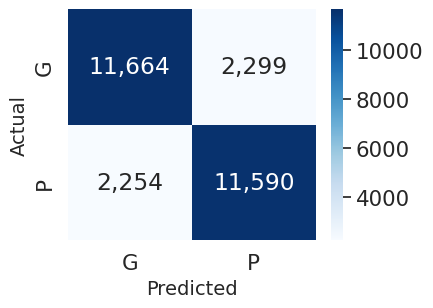

              precision    recall  f1-score   support

           G       0.84      0.84      0.84     13963
           P       0.83      0.84      0.84     13844

    accuracy                           0.84     27807
   macro avg       0.84      0.84      0.84     27807
weighted avg       0.84      0.84      0.84     27807



In [198]:
conf_mat = confusion_matrix(y_test, y_LR)

labels = d['Resultado'].sort_values().unique()
sns.set(font_scale=1.4) # para cambiar el tamaño de la fuente

fig, ax = plt.subplots(figsize=(4,3)) # cambiar el tamaño de la figura aquí

sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt=',',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

print(classification_report(y_test, y_LR, target_names=d['Resultado'].sort_values().unique()))

Segunda iteracion con los datos escalados

In [216]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

scaler = MinMaxScaler()
num_vars = numCols
X_train_s[num_vars] = scaler.fit_transform(X_train_s[num_vars])
X_test_s[num_vars] = scaler.fit_transform(X_test_s[num_vars])

Creacion del modelo escalado

In [223]:
#Creación del modelo 
modelLR_scaled = LogisticRegression()

#Entrenamiento del modelo con 80% de training
modelLR_scaled.fit(X_train_s, y_train)


LogisticRegression()

In [224]:
y_LR_scaled = modelLR_scaled.predict(X_test_s)
print("modelLR_scaled:",metrics.accuracy_score(y_test, y_LR_scaled))

modelLR_scaled: 0.49667349947854855


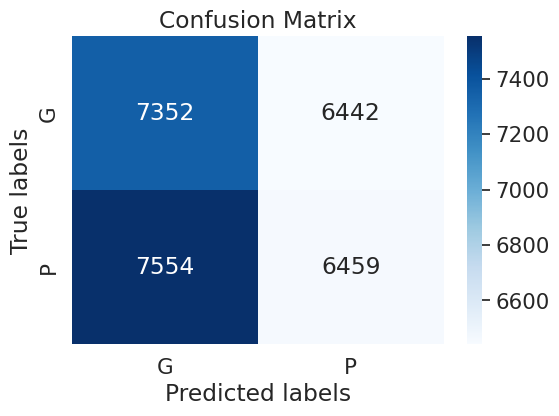

              precision    recall  f1-score   support

           G       0.49      0.53      0.51     13794
           P       0.50      0.46      0.48     14013

    accuracy                           0.50     27807
   macro avg       0.50      0.50      0.50     27807
weighted avg       0.50      0.50      0.50     27807



In [228]:
# Hacer predicciones en el conjunto de prueba
y_pred_scaled = modelLR_scaled.predict(X_test_s)

# Definir etiquetas para la matriz de confusión
labels = np.unique(y_test)

# Calcular la matriz de confusión con etiquetas definidas
conf_mat = confusion_matrix(y_test, y_pred_scaled, labels=labels)

# Graficar la matriz de confusión con etiquetas definidas
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', ax=ax,
            xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_scaled, target_names=labels))

## Función para simular encuentros entre cualquier jugador, en diferentes supercicies y circunstancias.

In [ ]:
def partidos(j1_name, j2_name, surface, j1_hand, j2_hand, j1_ranking, j2_ranking, muestras, tourney_level):
  """
  j1_name= Nombre del Jugador 1 (Entre comillas)
  j2_name= Nombre del Jugador 2 (Entre comillas)
  surface= Puede tomar uno de tres valores: "Hard", "Clay" o "Grass"
  j1_hand= 1 si es diestro o 0 si es zurdo
  j1_hand= 1 si es derecho o 0 si es zurdo
  j1_ranking= Número de ranking máximo del J1 (Se realizarán encuentros donde el J1 tenga ranking menor o igual al valor elegido)
  j2_ranking= Número de ranking máximo del J2 (Se realizarán encuentros donde el J2 tenga ranking menor o igual al valor elegido)
  muestras= Número de encuentros que se desea realizar
  tourney_level= Puede tomar dos valores: "G" Grand Slam ó "M" Masters 1000

  """

  col_base=x_i.reset_index(drop=True).head(0)  #Se crea un dataframe con las columnas necesarias
  col_base.drop(['J1_2ndWon', 'J1_ace', 'J1_bpFaced', 'J1_df', 'J1_age','J1_ht', 'J1_rank','J2_2ndWon',
       'J2_ace', 'J2_bpFaced', 'J2_df', 'J2_age','J2_ht','J2_rank'],axis=1,inplace=True) #Se eliminan las columnas que no se necesitan

  Jug1_Col=['J1_2ndWon', 'J1_ace', 'J1_bpFaced', 'J1_df', 'J1_age','J1_ht', 'J1_rank'] #Columnas que sólo se necesitan del Jug1
  Jug2_Col=['J2_2ndWon','J2_ace', 'J2_bpFaced', 'J2_df', 'J2_age','J2_ht','J2_rank']  #Columnas que sólo se necesitan del Jug2

  df=df_complete.sample(frac=1) #Dataframe con todos los registros de partidos ordenado aleatoriamente



  Jug1=df[(df["J1_name"]==j1_name) & (df["surface"]==surface) & (df["J1_rank"]<=j1_ranking)].head(muestras).reset_index(drop=True) #Se filtra por las condiciones que se indicaron al inicio
  Jug2=df[(df["J2_name"]==j2_name) & (df["surface"]==surface) & (df["J2_rank"]<=j2_ranking)].head(muestras).reset_index(drop=True) #

  Jug1=Jug1[Jug1_Col]
  Jug2=Jug2[Jug2_Col]

  match=pd.concat([col_base,Jug1], axis=0)
  match=pd.concat([match,Jug2], axis=1)

  match[["surface_"+surface,"tourney_level_"+tourney_level]]=match[["surface_"+surface,"tourney_level_"+tourney_level]].fillna(1)
  match["J1_hand_R"]=j1_hand
  match["J2_hand_R"]=j2_hand

  match=match.fillna(0).astype("int")
  match=match[['J1_2ndWon', 'J1_ace', 'J1_bpFaced', 'J1_df', 'J1_age', 'J1_ht',
        'J1_rank', 'J2_2ndWon', 'J2_ace', 'J2_bpFaced', 'J2_df', 'J2_age',
        'J2_ht', 'J2_rank', 'J1_hand_R', 'surface_Clay',
        'surface_Grass', 'surface_Hard', 'tourney_level_G', 'tourney_level_M',
        'J2_hand_R']]

  print(modelLR.predict(match))
  print(modelLRovrLinea.predict(match))
  print(modelLRovrlbfgs.predict(match))
  print(modelLRMullbfgs.predict(match))
  #print(pd.DataFrame(match))
  

In [ ]:
partidos("Rafael Nadal", "Andy Roddick", "Clay", 0, 1, 1, 10, 5, "G")  #Se prueba la función con dos jugadores aleatorios

['G' 'P' 'G' 'G' 'G']
['G' 'P' 'G' 'G' 'G']
['G' 'P' 'G' 'G' 'G']
['G' 'P' 'G' 'G' 'G']


## Conclusiones de la regresión logística

Se obtiene un accuracy del 84% que convierte este método en un buen estimador de los resultados que se quieren predecir, no obstante se indagará con otro método de predicción y se validará cual es el mejor método.

# Modelo Bayesiano

## Creación de Modelo Bayesiano

#### Escalamiento

In [ ]:
X_train_Bayes=X_train.copy() #Se hacen copias de los datos de prueba y de entrenamiento de los utilizados en la regresión logística 
X_test_Bayes=X_test.copy()

scaler = MinMaxScaler()
num_vars = numCols
X_train_Bayes[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test_Bayes[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train_Bayes[num_vars].head()

,J1_2ndWon,J1_ace,J1_bpFaced,J1_df,J1_age,J1_ht,J1_rank,J2_2ndWon,J2_ace,J2_bpFaced,J2_df,J2_age,J2_ht,J2_rank
136538,0.262295,0.026667,0.171429,0.130435,0.464286,0.479167,0.007941,0.147541,0.040000,0.235294,0.130435,0.392857,0.444444,0.214399
116012,0.245902,0.080000,0.028571,0.086957,0.428571,0.625000,0.053997,0.213115,0.120000,0.264706,0.347826,0.464286,0.600000,0.174696
58113,0.163934,0.000000,0.171429,0.086957,0.428571,0.312500,0.032822,0.262295,0.013333,0.117647,0.000000,0.428571,0.444444,0.005823
52046,0.180328,0.013333,0.142857,0.086957,0.500000,0.479167,0.005823,0.213115,0.160000,0.029412,0.000000,0.500000,0.666667,0.030704
91453,0.196721,0.133333,0.114286,0.086957,0.392857,0.750000,0.005294,0.180328,0.040000,0.323529,0.130435,0.250000,0.488889,0.016411


In [ ]:
#Creación del modelo 

modelGNB       = GaussianNB()
modelBNB       = BernoulliNB(binarize=True)
modelMNB       = MultinomialNB()

#Entrenamiento 

modelGNB.fit(X_train, y_train)
modelBNB.fit(X_train, y_train)
modelMNB.fit(X_train, y_train)

MultinomialNB()

### Evaluación del modelo

In [ ]:
y_modelGNB = modelGNB.predict(X_test)
y_modelBNB = modelBNB.predict(X_test)
y_modelMNB = modelMNB.predict(X_test)

In [ ]:
print("===========Accuracy KNN Gaussian NB ================")
print("modelGNB:",metrics.accuracy_score(y_test, y_modelGNB))
print("modelBNB:",metrics.accuracy_score(y_test, y_modelBNB))
print("modelMNB:",metrics.accuracy_score(y_test, y_modelMNB))

===========Accuracy KNN Gaussian NB ================
modelGNB: 0.8067393102456216
modelBNB: 0.6534325889164598
modelMNB: 0.6834609990290215


### Matriz de Confusión

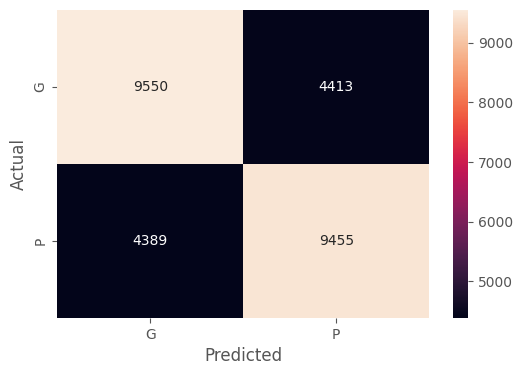

              precision    recall  f1-score   support

           G       0.69      0.68      0.68     13963
           P       0.68      0.68      0.68     13844

    accuracy                           0.68     27807
   macro avg       0.68      0.68      0.68     27807
weighted avg       0.68      0.68      0.68     27807



In [ ]:
#Matriz de confusión

conf_mat = confusion_matrix(y_test, y_modelMNB)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=d['Resultado'].sort_values().unique()
            , yticklabels=d['Resultado'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, y_modelMNB))

## Conclusiones del modelo Bayesiano

Se evidencia que los resultados con el modelo de Bayes es bajo dando un accuracy de 69%, por lo que la regresión logistica sigue siendo el mejor predictor.

# Modelo KNN - Gaussian

## Creación del modelo

In [ ]:
#Creación del modelo 


modelKNN       = KNeighborsClassifier(n_neighbors=10)
modelBNB       = BernoulliNB(binarize=True)
modelMNB       = MultinomialNB()
modelGNB       = GaussianNB()

#Entrenamiento del modelo con 80% de training

modelKNN.fit(X_train, y_train)
modelBNB.fit(X_train, y_train)
modelMNB.fit(X_train, y_train)
modelGNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_modelKNN = modelKNN.predict(X_test)
y_modelBNB = modelBNB.predict(X_test)
y_modelMNB = modelMNB.predict(X_test)
y_modelGNB = modelGNB.predict(X_test)

In [ ]:
print("===========Accuracy KNN Gaussian NB ================")
print("modelKNN:",metrics.accuracy_score(y_test, y_modelKNN))
print("modelBNB:",metrics.accuracy_score(y_test, y_modelBNB))
print("modelMNB:",metrics.accuracy_score(y_test, y_modelMNB))
print("modelGNB:",metrics.accuracy_score(y_test, y_modelGNB))

===========Accuracy KNN Gaussian NB ================
modelKNN: 0.7785449706908333
modelBNB: 0.6534325889164598
modelMNB: 0.6834609990290215
modelGNB: 0.8067393102456216


In [ ]:
#Convertir y_test bad y good en 1 y 0

#Convertir y_test bad y good en 1 y 0

e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('G',1, inplace=True)
e_dataframe.replace('P', 0,inplace=True)
arr = e_dataframe.to_numpy()

0.86: KNeighborsClassifier(n_neighbors=10)
0.75: BernoulliNB(binarize=True)
0.73: MultinomialNB()
0.86: GaussianNB()


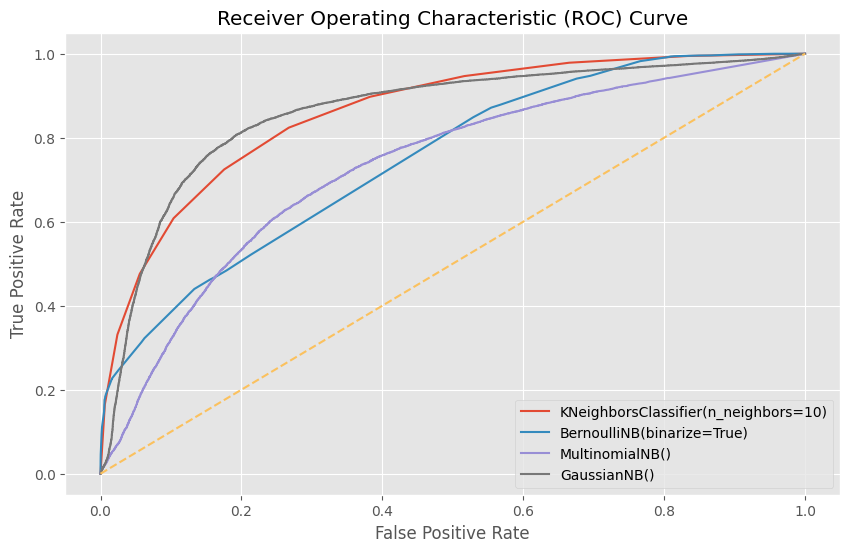

In [ ]:
fig = plt.figure(figsize=(10,6))

Modelos = [modelKNN, modelBNB, modelMNB, modelGNB]

for i in range(len(Modelos)):
    
    probs = Modelos[i].predict_proba(X_test)
    probs = probs[:, 1]
    auc = roc_auc_score(arr, probs*(-1))

    fpr, tpr, _ = roc_curve(arr, probs*(-1))
    
    plt.plot(fpr, tpr,  label=Modelos[i])

    print("{:.2f}: {}".format(auc, Modelos[i]))


plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Conclusiones

Se evidencia que los resultados con los modelos KNN, Multinomial, Bernoulli y Gaussiano son más bajos que los obtenidos con la regresión logistica con un accuracy de 77%, 65%, 68% y 80%, respectivamente.

# Random Forest

## . Creación del modelo y entrenamiento del modelo

### Escalamiento

In [ ]:
X_train_forest=X_train.copy() #Se hacen copias de los datos de prueba y de entrenamiento de los utilizados en la regresión logística 
X_test_forest=X_test.copy()

scaler = MinMaxScaler()
num_vars = numCols
X_train_forest[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test_forest[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train_forest[num_vars].head()

,J1_2ndWon,J1_ace,J1_bpFaced,J1_df,J1_age,J1_ht,J1_rank,J2_2ndWon,J2_ace,J2_bpFaced,J2_df,J2_age,J2_ht,J2_rank
136538,0.262295,0.026667,0.171429,0.130435,0.464286,0.479167,0.007941,0.147541,0.040000,0.235294,0.130435,0.392857,0.444444,0.214399
116012,0.245902,0.080000,0.028571,0.086957,0.428571,0.625000,0.053997,0.213115,0.120000,0.264706,0.347826,0.464286,0.600000,0.174696
58113,0.163934,0.000000,0.171429,0.086957,0.428571,0.312500,0.032822,0.262295,0.013333,0.117647,0.000000,0.428571,0.444444,0.005823
52046,0.180328,0.013333,0.142857,0.086957,0.500000,0.479167,0.005823,0.213115,0.160000,0.029412,0.000000,0.500000,0.666667,0.030704
91453,0.196721,0.133333,0.114286,0.086957,0.392857,0.750000,0.005294,0.180328,0.040000,0.323529,0.130435,0.250000,0.488889,0.016411


###Grid Search basado en out-of-bag score

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train_forest, y_train)
    
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head()

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓


KeyboardInterrupt: ignored

In [ ]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-accuracy)")
print("--------------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_accuracy'], "accuracy")

## Conclusiones del random forest

Se obtiene un accuracy del 83.09% que convierte este método en un buen estimador de los resultados que se quieren predecir, con un resultado bastante similar al obtenido con la regresión logística.

## Conclusiones generales

* Se pudieron determinar las variables que pueden explicar con un accuracy del 83% quien ganaría un partido de tenis profesional en tenis de campo teniendo los datos de las estadísticas del match. Es importante tener en cuenta que sólo se consideraron partidos entre jugadores dentro del top 100 desde 1991 que es el año desde el cual se tiene registro de las estadísticas de los encuentros.
* Es posible que el desempeño del modelo se hubiera dado debido a los jugadores que se tuvieron en cuenta para entrenarlo y evaluarlo, pues son los tenistas que presentan una mayor regularidad en el circuito y extrapolar el modelo a jugadores fuera del top 100 podría no tener un resultado favorable debido a que la variabilidad de los datos podría hacer muy dificil crear un modelo con una alta confiabilidad.
* El modelo no es posible aplicarlo para predecir resultados en la actualidad antes de que se den los partidos ya que el mismo considera las estadísticas del encuentro por lo que al no tenerlas no se podría predecir un ganador.
* En el modelo se tuvieron en cuenta variables categóricas como lo fueron la superficie y la mano hábil de cada jugador. Tales variables se consideran importantes ya que pueden ser determinantes en el resultado de un partido, brindando ventajas competitivas a algunos jugadores en ciertos terrenos o por el contrario afectar su desempeño.